In [1]:
import xarray as xr
import xesmf as xe
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import combine_datasets
from cmip6_preprocessing.postprocessing import merge_variables
from dask.diagnostics import ProgressBar

In [ ]:
conversion =  1e6/1035
results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])

<ipython-input-45-43d58cdb3b55>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 0, vmax = 1000)


Text(0.5, 1.0, 'UKESM1-0-LL.gn.historical.Omon')

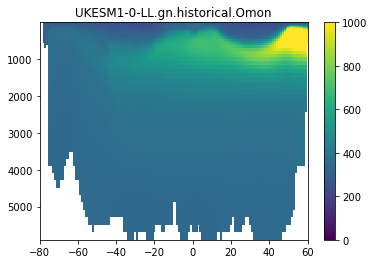

In [45]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=[6,4])
im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 0, vmax = 1000)

ax.set_xlim([-80,60])
ax.invert_yaxis()
cbar = plt.colorbar(im,ax=ax)
ax.set_title('UKESM1-0-LL.gn.historical.Omon')


In [2]:
dd= {}

In [3]:
# dd = {}
dd['UKESM1-0-LL.gn.historical.Omon'] = {}
ds = dd['UKESM1-0-LL.gn.historical.Omon']
ds['dissic']= xr.open_dataset('UKESM1_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('UKESM1_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('UKESM1_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('UKESM1_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('UKESM1_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)

In [17]:
ds = dd['UKESM1-0-LL.gn.historical.Omon']
conversion =  1e6/1035
results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])

In [4]:
dd['CanESM5-CanOE.gn.historical.Omon'] = {}
dd['CanESM5-CanOE.gn.historical.Omon']['dissic']= xr.open_dataset('CanESM5CanOE_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
dd['CanESM5-CanOE.gn.historical.Omon']['talk']= xr.open_dataset('CanESM5CanOE_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
dd['CanESM5-CanOE.gn.historical.Omon']['thetao']= xr.open_dataset('CanESM5CanOE_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
dd['CanESM5-CanOE.gn.historical.Omon']['so']= xr.open_dataset('CanESM5CanOE_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
dd['CanESM5-CanOE.gn.historical.Omon']['p'] = gsw.p_from_z(-1*dd['CanESM5-CanOE.gn.historical.Omon']['dissic'].lev, dd['CanESM5-CanOE.gn.historical.Omon']['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(dd['CanESM5-CanOE.gn.historical.Omon']['talk']) # expand along time dimension
dd['CanESM5-CanOE.gn.historical.Omon']['insitutemp'] = gsw.t_from_CT(dd['CanESM5-CanOE.gn.historical.Omon']['so'].so, dd['CanESM5-CanOE.gn.historical.Omon']['thetao'].thetao, dd['CanESM5-CanOE.gn.historical.Omon']['p'].talk)
dd['CanESM5-CanOE.gn.historical.Omon']['fgco2']= xr.open_dataset('CanESM5CanOE_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)

In [5]:
dd['CNRM-ESM2-1.gn.historical.Omon'] = {}
ds = dd['CNRM-ESM2-1.gn.historical.Omon']
ds['dissic']= xr.open_dataset('CNRM_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CNRM_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CNRM_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CNRM_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CNRM_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)

In [6]:
dd['CanESM5.gn.historical.Omon'] = {}
ds = dd['CanESM5.gn.historical.Omon']
ds['dissic']= xr.open_dataset('CanESM5_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CanESM5_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CanESM5_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CanESM5_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CanESM5_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [7]:
dd['IPSL-CM6A-LR.gn.historical.Omon'] = {}
ds = dd['IPSL-CM6A-LR.gn.historical.Omon']
ds['dissic']= xr.open_dataset('IPSL_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('IPSL_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('IPSL_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('IPSL_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('IPSL_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [8]:
dd['CESM2-WACCM.gr.historical.Omon'] = {}
ds = dd['CESM2-WACCM.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-WACCM_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CESM2-WACCM_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CESM2-WACCM_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CESM2-WACCM_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-WACCM_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [9]:
# 'CESM2.gr.historical.Omon'
dd['CESM2.gr.historical.Omon'] = {}
ds = dd['CESM2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CESM2_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CESM2_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CESM2_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [10]:
# 'CESM2-WACCM-FV2.gr.historical.Omon'
dd['CESM2-WACCM-FV2.gr.historical.Omon'] = {}
ds = dd['CESM2-WACCM-FV2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-WACCM-FV2_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CESM2-WACCM-FV2_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CESM2-WACCM-FV2_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CESM2-WACCM-FV2_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-WACCM-FV2_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [11]:
# 'GFDL-ESM4.gr.historical.Omon'
dd['GFDL-ESM4.gr.historical.Omon'] = {}
ds = dd['GFDL-ESM4.gr.historical.Omon']
ds['dissic']= xr.open_dataset('GFDL-ESM4_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('GFDL-ESM4_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('GFDL-ESM4_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('GFDL-ESM4_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('GFDL-ESM4_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [12]:
# 'CESM2-FV2.gr.historical.Omon'
dd['CESM2-FV2.gr.historical.Omon'] = {}
ds = dd['CESM2-FV2.gr.historical.Omon']
ds['dissic']= xr.open_dataset('CESM2-FV2_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('CESM2-FV2_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('CESM2-FV2_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('CESM2-FV2_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('CESM2-FV2_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [13]:
# 'GFDL-CM4.gr.historical.Omon'
dd['GFDL-CM4.gr.historical.Omon'] = {}
ds = dd['GFDL-CM4.gr.historical.Omon']
ds['dissic']= xr.open_dataset('GFDL-CM4_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('GFDL-CM4_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('GFDL-CM4_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('GFDL-CM4_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('GFDL-CM4_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)


In [14]:
# 'MRI-ESM2-0.gr.historical.Omon'
dd['MRI-ESM2-0.gr.historical.Omon'] = {}
ds = dd['MRI-ESM2-0.gr.historical.Omon']
ds['dissic']= xr.open_dataset('MRI-ESM2-0_dissic_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['talk']= xr.open_dataset('MRI-ESM2-0_talk_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['thetao']= xr.open_dataset('MRI-ESM2-0_thetao_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['so']= xr.open_dataset('MRI-ESM2-0_so_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)
ds['p'] = gsw.p_from_z(-1*ds['dissic'].lev, ds['dissic'].y, geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds['talk']) # expand along time dimension
ds['insitutemp'] = gsw.t_from_CT(ds['so'].so, ds['thetao'].thetao, ds['p'].talk)
ds['fgco2']= xr.open_dataset('MRI-ESM2-0_fgco2_20yr.nc').isel(x=slice(180,200)).mean('x', keep_attrs=True)

<ipython-input-36-0283e9df85f8>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 300, vmax = 650)


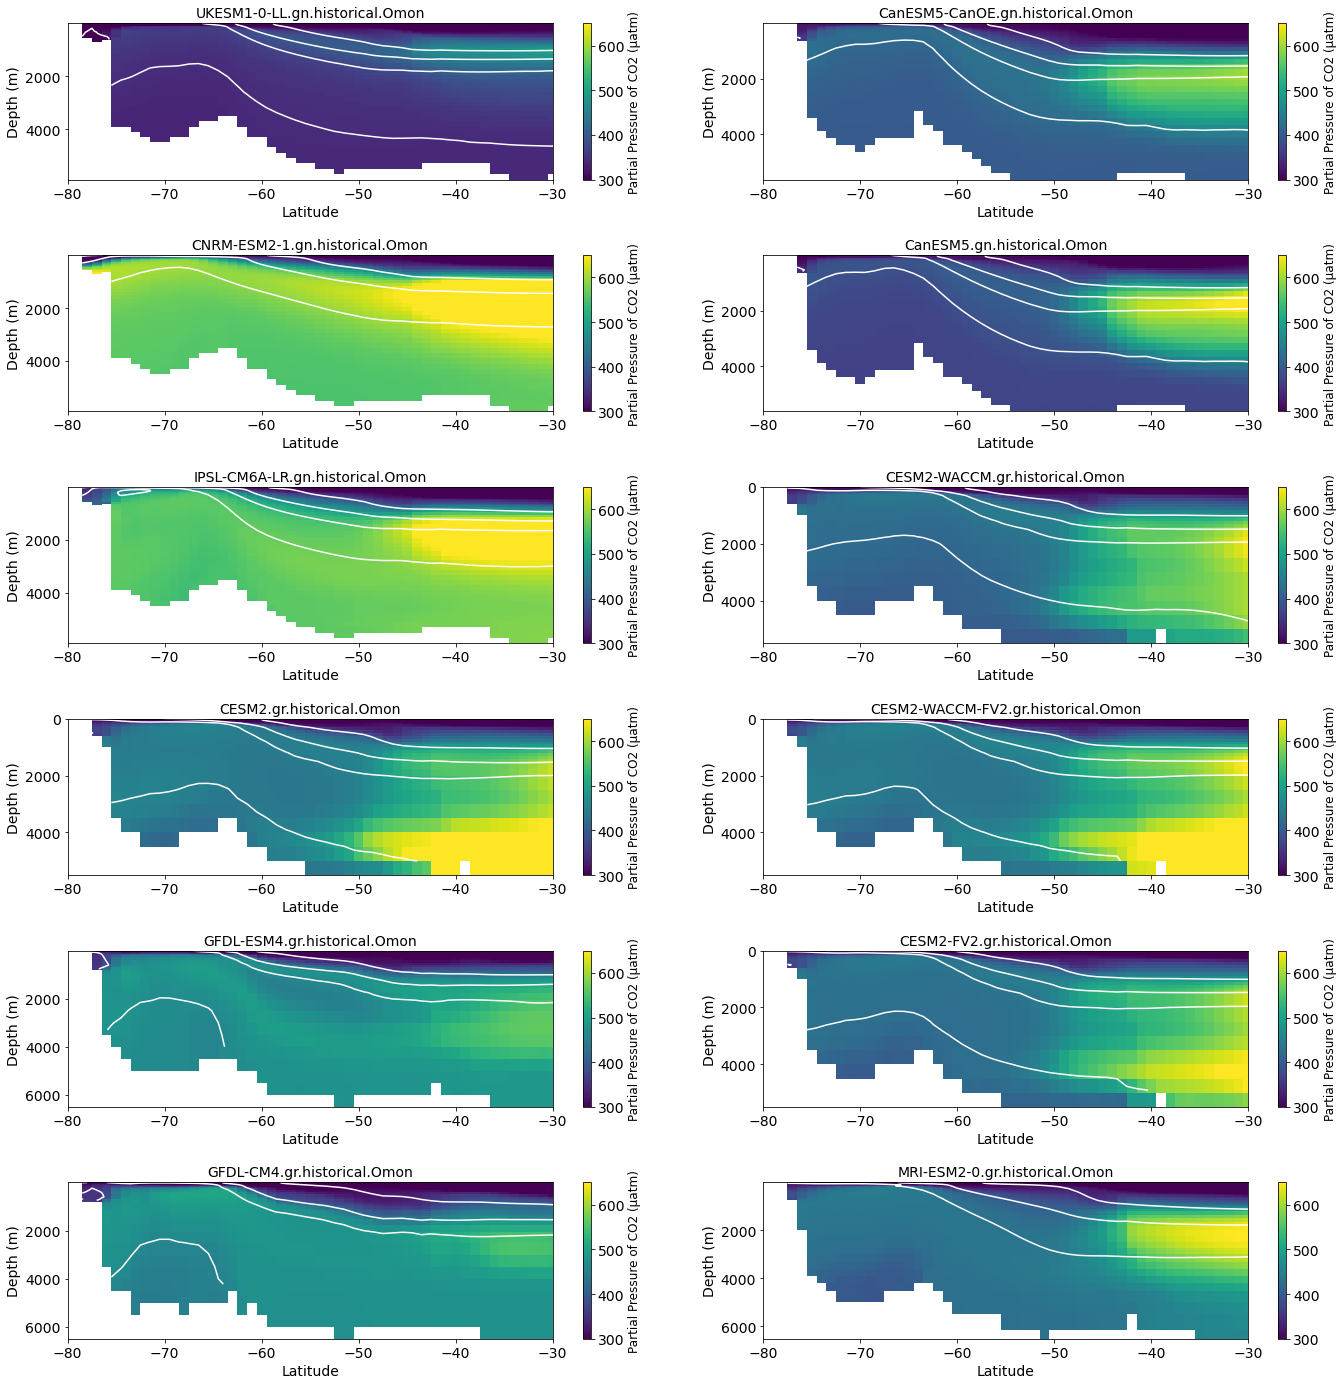

In [36]:
fig_pco2, axarr_pco2 = plt.subplots(nrows = 6, ncols = 2, figsize=[20,20])
fig_pco2.tight_layout(pad = 3.5)
plt.rc('font', size = 14)
plt.rc('axes', titlesize= 14)    
plt.rc('axes', labelsize= 12)
plt.rc('figure', titlesize=16)


#loop over each key, value pair of the dictionary
ax_idx = 0 # index for your axes array
for name, ds in dd.items():
    ax = axarr_pco2.flat[ax_idx]
    conversion =  1e6/1035
    results = pyco2.sys(par1=ds['talk'].talk*conversion,par2=ds['dissic'].dissic*conversion,par1_type=1,par2_type=2,
                        pressure_out=0, temperature_out = ds['thetao'].thetao, pressure = ds['p'].talk, 
                        temperature = ds['insitutemp'])
    ax.set_xlim([-80,-30])
    im = ax.pcolormesh(ds['dissic'].y,ds['dissic'].lev,results['pCO2_out'], vmin = 300, vmax = 650)
    sigma2 = gsw.sigma2(ds['so'].so,ds['thetao'].thetao)
    CS = ax.contour(ds['dissic'].y,ds['dissic'].lev,sigma2,levels=[36, 36.5, 36.75, 37], colors = 'w')
#     ax.clabel(CS, inline=1, fontsize=12, manual = False)
    ax.invert_yaxis()
    cbar.set_label('Partial Pressure of CO2 (\u03BCatm)')
    cbar = plt.colorbar(im,ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)')
    ax_idx += 1 # thi


AttributeError: 'Dataset' object has no attribute 'lat'

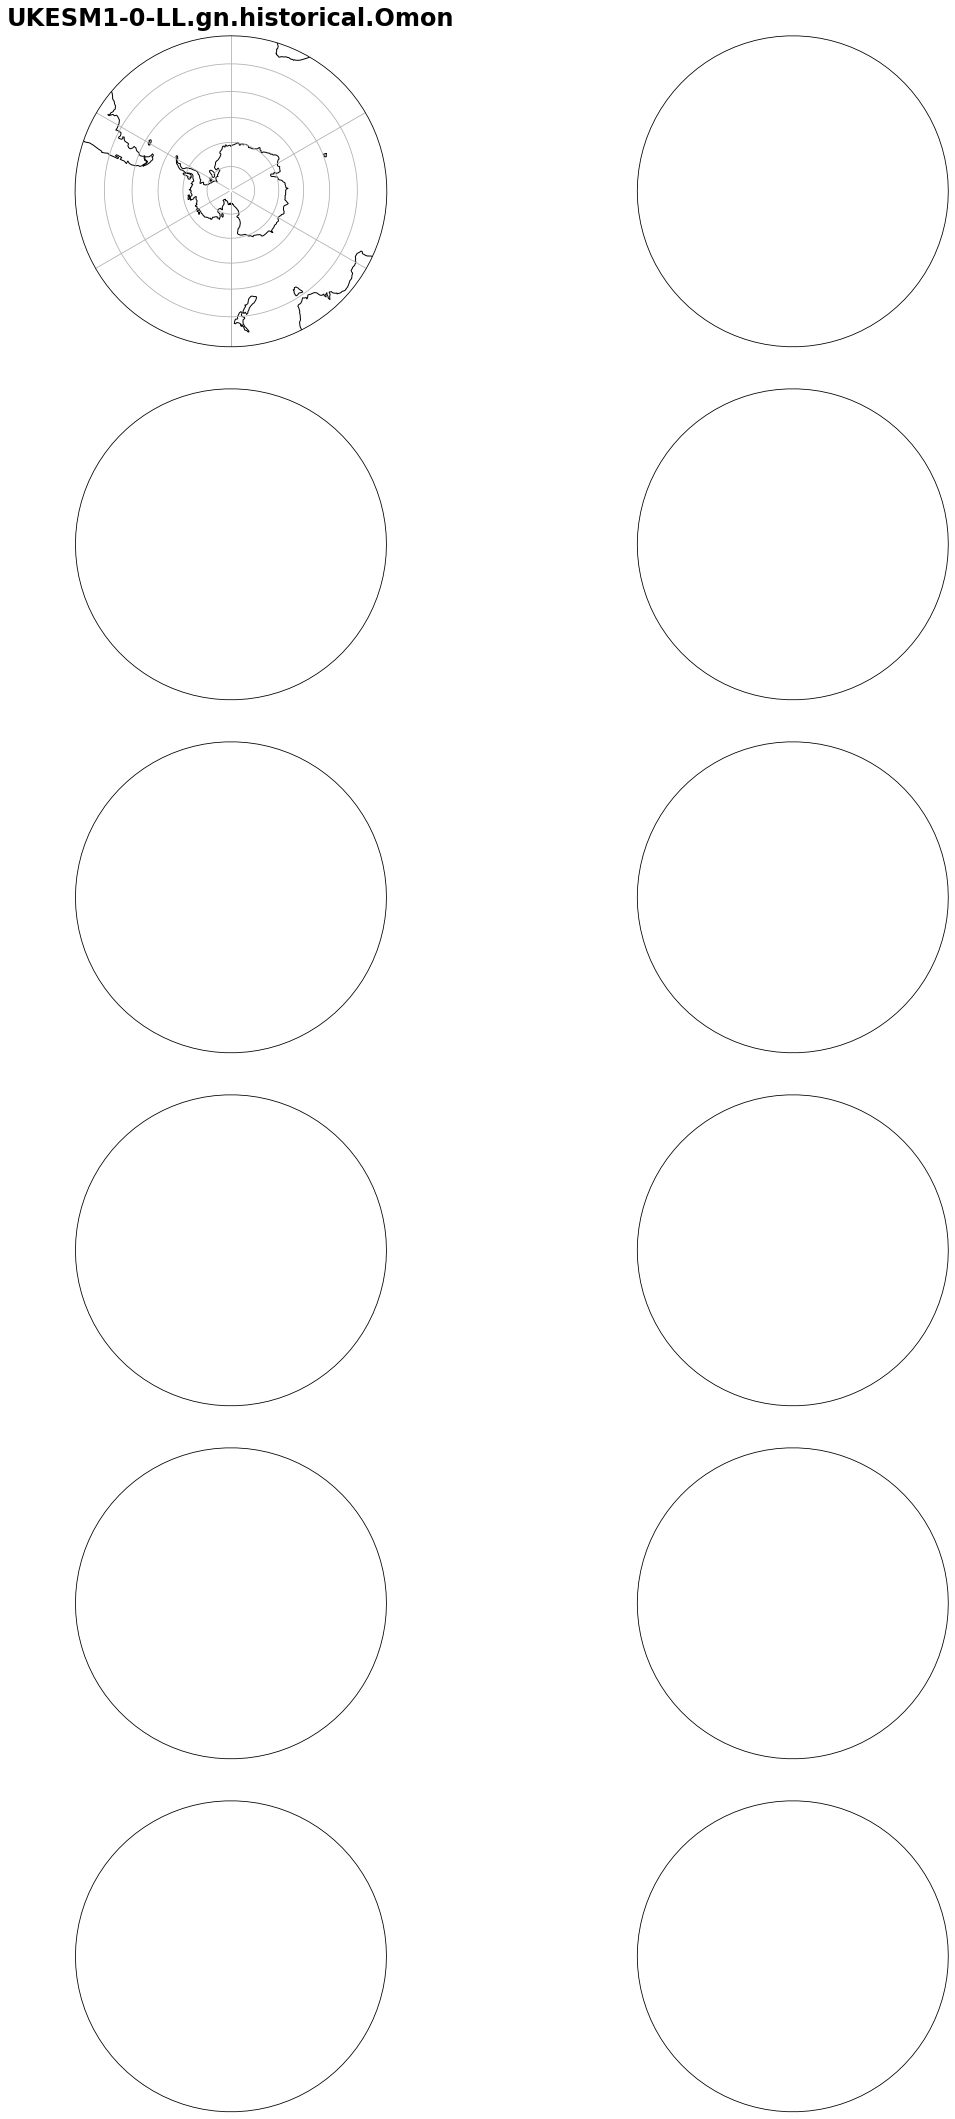

In [39]:
fig, axarr = plt.subplots(nrows = 6, ncols=2, figsize=[20,30], subplot_kw={'projection':ccrs.SouthPolarStereo()})
fig.tight_layout(pad = 3)
crs_plot = ccrs.SouthPolarStereo()
crs_source = ccrs.PlateCarree()

ax_idx = 0 # index for your axes array
for name, ds in dd.items():

    ax = axarr.flat[ax_idx]
    #fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':crs_plot})
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    ax.set_extent([-180, 180, -90, -30], crs_source)
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    
    ax.gridlines()
    ax.coastlines()
    
    title=name
    ax.set_title(title,fontsize=24,pad = 10, fontweight = 'bold')
    
    lat = ds['dissic'].lat.transpose('y','x')
    lon = ds['dissic'].lon.transpose('y','x')
    X = lon
    Y = lat
    
    conversion = 3.1536e7 * 22.72
    # 3.1536e7 seconds per year
    # 22.72 mol CO2 per kg -- 44.01 gCO2/mol
    Z = ds['fgco2'].fgco2.isel(time = slice(0, 239)).mean('time', keep_attrs=True)*conversion
#     rho = calc_sigma2(ds.isel(time = slice(0, 239)).isel(lev=0).mean('time', keep_attrs=True))
#     rho = rho.transpose('x','y')
#     rho.assign_coords({'lat': Y})
#     rho.assign_coords({'lon': X})
# #     rho = rho.transpose('y','x')
# #     print(Z)
# #     print(rho)
    
    
    im = ax.pcolormesh(X,Y,-1*Z,cmap='RdBu_r', transform = crs_source, shading = 'auto', vmin = -1, vmax = 1)
#     CS = ax.contour(ds['lon'],ds['lat'],rho,transform=crs_source,levels=[35, 35.5, 36],colors='#1d6500', linewidths = 0.75)
    
    cbar_label = 'Surface Upward Flux of Total CO\u2082 (mol/m\u00b2/yr)'
    cbar = plt.colorbar(im,ax = ax, orientation='horizontal',fraction = 0.07, pad=0.05)
    cbar.set_label(cbar_label, fontsize = 20)
    cbar.ax.tick_params(labelsize=18)
    ax.clabel(CS, inline=1, fontsize=8)
    
    ax_idx += 1


In [40]:
ds['dissic']

<xarray.Dataset>
Dimensions:  (lev: 75, y: 180)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    dissic   (lev, y) float64 nan nan nan nan nan nan ... nan nan nan nan nan